In [1]:
import pandas as pd

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

### head() prints first 5 rows of train, in this case train.csv file.

In [2]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Data Dictionary
     Survived: 0 = no, 1 = yes.
     pclass: ticket class 1 = 1st, 2 = 2nd, 3 = 3rd
     sibsp: # of siblings/spouses aboard the ship
     parch: # of parents/children aboard the ship
     ticket: ticket number
     cabin: cabin number
     embarked: port of embarkation, Cherbourg, Queenstown, Southampton

In [3]:
test.head()

,PassengerId,Name,Pclass,Sex,Age,Cabin,SibSp,Parch,Ticket,Fare,Embarked
0,892,Mrs. Duckface,2,female,24,T,1,1,555,45,S
1,912,Mr. Aimsoded,3,male,70,G,0,0,2093,69,S
2,991,"Somuch, Mr. Gunnadai",3,male,79,G,0,0,948,43,S
3,964,"Ysempassable, Mrs. Furmetudai",1,female,29,A,1,0,3285,43,C
4,997,Lolailo Lelolo,2,female,45,E,1,3,3750,3,S


In [4]:
train.shape

(891, 12)

## var.shape shows the number of rows followed by the number of columns in that variable.

In [5]:
test.shape

(7, 11)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 11 columns):
PassengerId    7 non-null int64
Name           7 non-null object
Pclass         7 non-null int64
Sex            7 non-null object
Age            7 non-null int64
Cabin          7 non-null object
SibSp          7 non-null int64
Parch          7 non-null int64
Ticket         7 non-null int64
Fare           7 non-null int64
Embarked       7 non-null object
dtypes: int64(7), object(4)
memory usage: 696.0+ bytes


## var.info() gives you the datatype of each piece of information in the file.
We can also see that some information is missing in the file, like e.g. age, 86 passengers age is missing, or the cabin number, where a total of 327 passenger's cabin are unknown.

In [8]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### isnull(): checks what values are null, or in this case, missing. 
### sum(): just sums all of them.


In [9]:
test.isnull().sum()

PassengerId    0
Name           0
Pclass         0
Sex            0
Age            0
Cabin          0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline 
# it will make plot outputs appear and they will be stored in the notebook
import seaborn as sns
sns.set() 
# setting seaborn default for plots 

# Bar_chart for Features:
  ### - Pclass
  ### - Sex
  ### - SibSp
  ### - Parch
  ### - Embarked
  ### - Cabin

In [11]:
def bar_chart(feature):
    # var.value_counts() returns a series containing counts of unique values.
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    # pandas.DataFrame() builds a table with the given values
    df = pd.DataFrame([survived, dead])
    # pandas.index stablish what the headers of the table will be
    df.index = ['Survived', 'Dead']
    # pandas.plot() shows a grafic made of bars in this case ('bar').
    df.plot(kind='bar', stacked=True, figsize=(10,5))

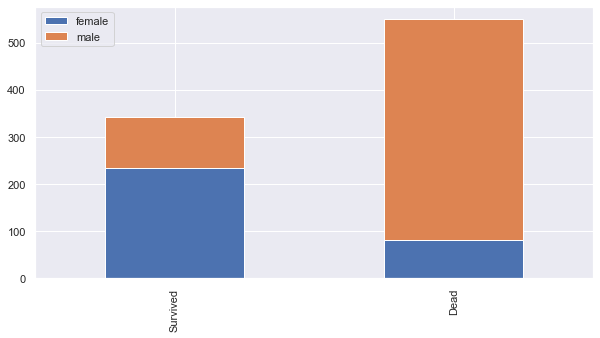

In [12]:
bar_chart('Sex')

As expected, **women** were more likely to survive the tragedy.

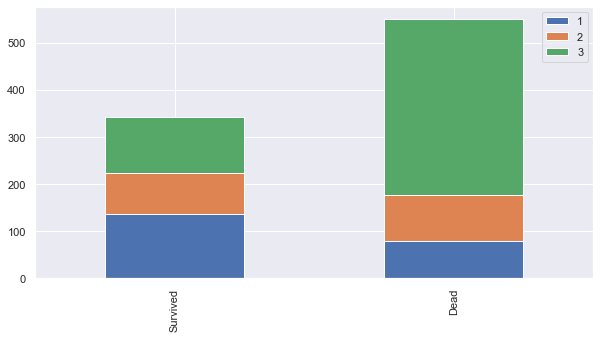

In [13]:
bar_chart('Pclass')

This chart confirms that the mayority of survivors were **First Class**
Also the mayority of deaths were **Third Class**

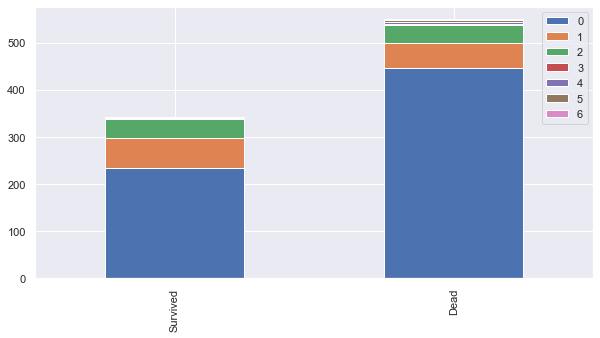

In [14]:
bar_chart('Parch')

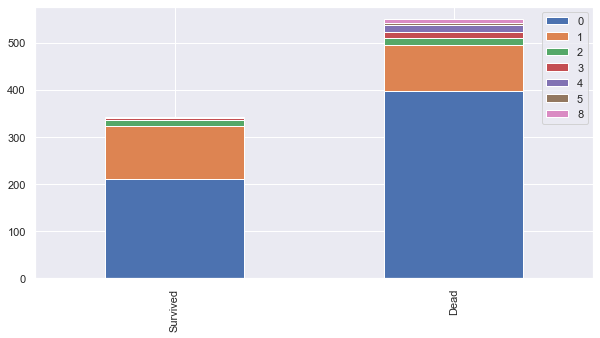

In [15]:
bar_chart('SibSp')

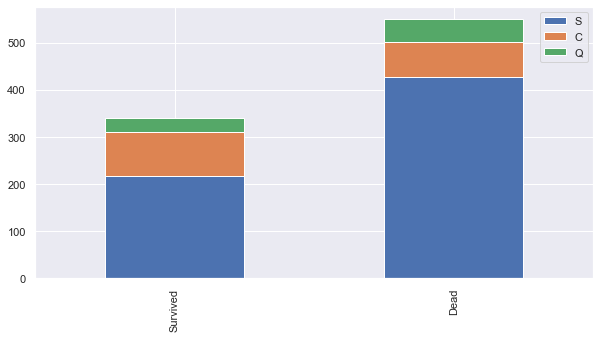

In [16]:
bar_chart('Embarked')

This chart suggest that people from C slightly more likely survived, while the other ones show a more confusing and randomish pattern.

## Feature Engineering
Feature Engineering is the process of using domain knowledge of the data to create features (feature vectors) that make machine learning algorithms work.
Feature vectors are a n-dmiensional vector of numerical features that represent some object.
Many algorithms in machine learning require a numerical representation of objects, since such representations facilitate processing and statistical analysis.

In [17]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


## Name

In [18]:
# Combines both datasets into one
train_test_data = [train, test]

# For loop that checks each row of the combined dataset and extracts the title by taking what has a space before it and anything
# until it sees a point.
for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [19]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Col           2
Major         2
Mme           1
Ms            1
Sir           1
Capt          1
Don           1
Countess      1
Jonkheer      1
Lady          1
Name: Title, dtype: int64

In [20]:
test['Title'].value_counts()

Mrs    1
Mr     1
Name: Title, dtype: int64

### Title map:
- Mr = 0
- Miss = 1
- Mrs = 2
- Other = 3

In [21]:
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, 
                 "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Dona": 3, "Ms": 3, "Sir": 3, "Capt": 3, 
                 "Don": 3, "Countess": 3, "Jonkheer": 3, "Mlle": 3, "Mme": 3, "Lady": 3, "Major": 3 }

# pandas.map substitutes each value of the series by the value selected, in this case we defined that above.
for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)

In [22]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


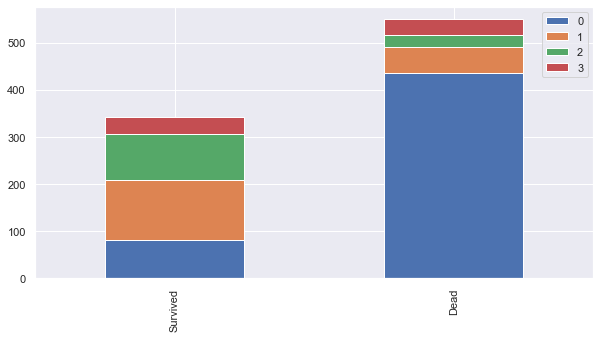

In [23]:
bar_chart('Title')

The Chart represents again that **Miss** and **Mrs** were more likely to survive than the other titles.

In [24]:
# pandas.drop deletes pieces of code by specifying label names and axis.
train.drop('Name', axis=1, inplace=True)
test.drop('Name', axis=1, inplace=True)

In [25]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [26]:
test.head()

,PassengerId,Pclass,Sex,Age,Cabin,SibSp,Parch,Ticket,Fare,Embarked,Title
0,892,2,female,24,T,1,1,555,45,S,NaN
1,912,3,male,70,G,0,0,2093,69,S,NaN
2,991,3,male,79,G,0,0,948,43,S,0.0
3,964,1,female,29,A,1,0,3285,43,C,2.0
4,997,2,female,45,E,1,3,3750,3,S,NaN


In [27]:
sex_mapping = {"male": 0, "female": 1}

for dataset in train_test_data:
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)

In [28]:
test.head()

,PassengerId,Pclass,Sex,Age,Cabin,SibSp,Parch,Ticket,Fare,Embarked,Title
0,892,2,1,24,T,1,1,555,45,S,NaN
1,912,3,0,70,G,0,0,2093,69,S,NaN
2,991,3,0,79,G,0,0,948,43,S,0.0
3,964,1,1,29,A,1,0,3285,43,C,2.0
4,997,2,1,45,E,1,3,3750,3,S,NaN


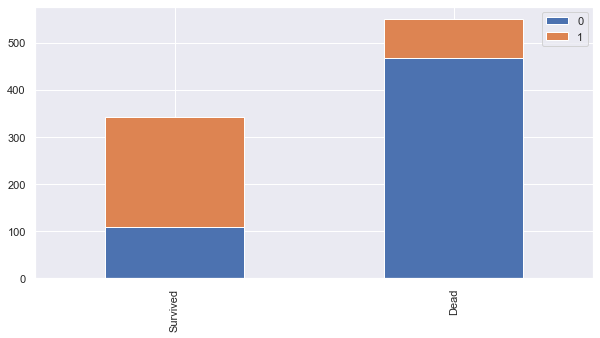

In [29]:
bar_chart('Sex')

## Age
   **Some age is missing:**
We will use the average age to fill those pieces of data.

In [30]:
train.head(100)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.00,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,38.00,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,26.00,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,35.00,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,35.00,0,0,373450,8.0500,NaN,S,0
5,6,0,3,0,NaN,0,0,330877,8.4583,NaN,Q,0
6,7,0,1,0,54.00,0,0,17463,51.8625,E46,S,0
7,8,0,3,0,2.00,3,1,349909,21.0750,NaN,S,3
8,9,1,3,1,27.00,0,2,347742,11.1333,NaN,S,2
9,10,1,2,1,14.00,1,0,237736,30.0708,NaN,C,2


In [31]:
# filling missing age with the median age for each title.
train['Age'].fillna(train.groupby('Title')['Age'].transform('median'), inplace=True)
test['Age'].fillna(train.groupby('Title')['Age'].transform('median'), inplace=True)

train.groupby('Title')['Age'].transform('median')

0      30.0
1      35.0
2      21.0
3      35.0
4      30.0
5      30.0
6      30.0
7       9.0
8      35.0
9      35.0
10     21.0
11     21.0
12     30.0
13     30.0
14     21.0
15     35.0
16      9.0
17     30.0
18     35.0
19     35.0
20     30.0
21     30.0
22     21.0
23     30.0
24     21.0
25     35.0
26     30.0
27     30.0
28     21.0
29     30.0
       ... 
861    30.0
862    35.0
863    21.0
864    30.0
865    35.0
866    21.0
867    30.0
868    30.0
869     9.0
870    30.0
871    35.0
872    30.0
873    30.0
874    35.0
875    21.0
876    30.0
877    30.0
878    30.0
879    35.0
880    35.0
881    30.0
882    21.0
883    30.0
884    30.0
885    35.0
886     9.0
887    21.0
888    21.0
889    30.0
890    30.0
Name: Age, Length: 891, dtype: float64

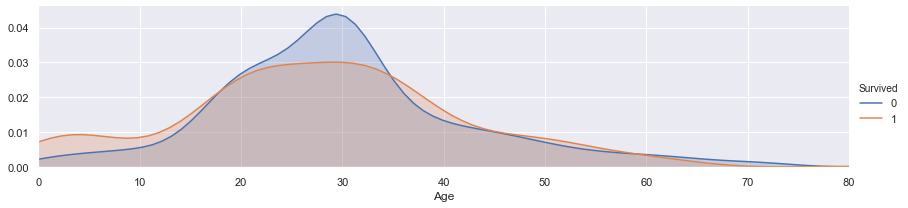

In [32]:
facet = sns.FacetGrid(train, hue='Survived', aspect=4)
facet.map(sns.kdeplot, 'Age', shade=True)
# xlim = limit of x axis, in this case its equal to range from 0 to maximum age in the label 'Age'
facet.set(xlim=(0, train['Age'].max()))
# adds a legend
facet.add_legend()

plt.show()

(20, 30)

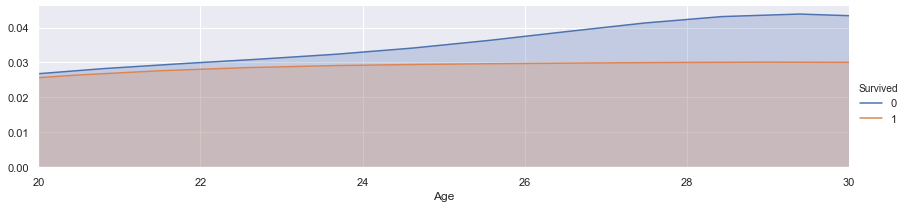

In [33]:
facet = sns.FacetGrid(train, hue='Survived', aspect=4)
facet.map(sns.kdeplot, 'Age', shade=True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
# you can specify the limits of the graphic you want to show, in this case between the age of 20 and 30
plt.xlim(20, 30)

### Bining:
Bining or converting numerical age to categorical variable

feature vector map:
- child: 0
- young: 1
- adult: 2
- mid-age: 3
- senior: 4
    

In [34]:
# pandas.loc locates the range selected and in this case we change it to an specific value depending on that range.
for dataset in train_test_data:
    dataset.loc[dataset['Age'] <= 16, 'Age' ] = 0,
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 26), 'Age' ] = 1,
    dataset.loc[(dataset['Age'] > 26) & (dataset['Age'] <= 36), 'Age' ] = 2,
    dataset.loc[(dataset['Age'] > 36) & (dataset['Age'] <= 62), 'Age' ] = 3,
    dataset.loc[ dataset['Age'] > 62, 'Age' ] = 4

In [35]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,S,0


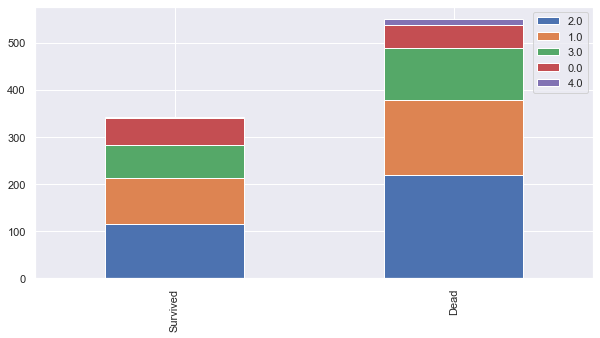

In [36]:
bar_chart('Age')

## Embarked

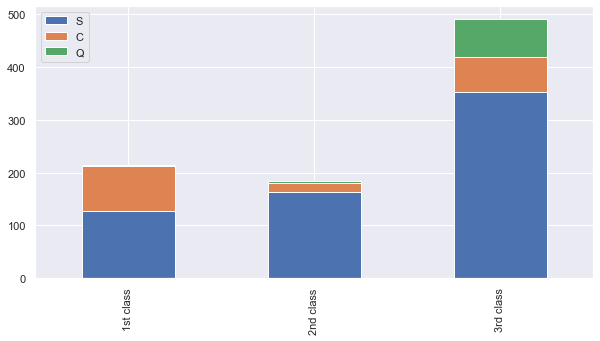

In [37]:
Pclass1 = train[train['Pclass']==1]['Embarked'].value_counts()
Pclass2 = train[train['Pclass']==2]['Embarked'].value_counts()
Pclass3 = train[train['Pclass']==3]['Embarked'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class', '2nd class', '3rd class']
df.plot(kind='bar', stacked=True, figsize=(10,5))

In [38]:
# since the majority of the passengers came from Southampton we will fill the missing embark with that.

for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S') 

In [39]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,S,0


In [40]:
# mapping the 'Embarked'
embarked_mapping = {'S': 0, 'C': 1, 'Q':2}

for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)

In [41]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,0,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,0,0


## Filling Fare

In [42]:
# filling missing fare
train['Fare'].fillna(train.groupby('Pclass')['Fare'].transform('median'), inplace=True)
test['Fare'].fillna(train.groupby('Pclass')['Fare'].transform('median'), inplace=True)

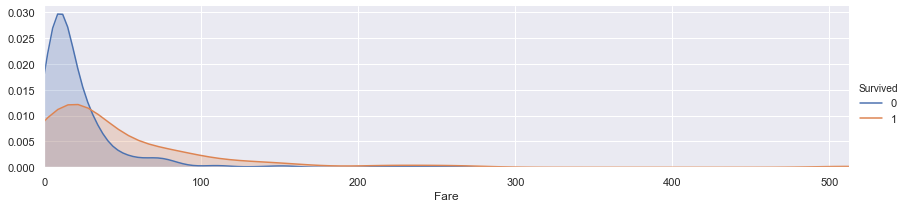

In [43]:
facet1 = sns.FacetGrid(train, hue='Survived', aspect=4)
facet1.map(sns.kdeplot,'Fare', shade=True)
facet1.set(xlim=(0, train['Fare'].max()))
facet1.add_legend()
plt.show()

(0, 512.3292)

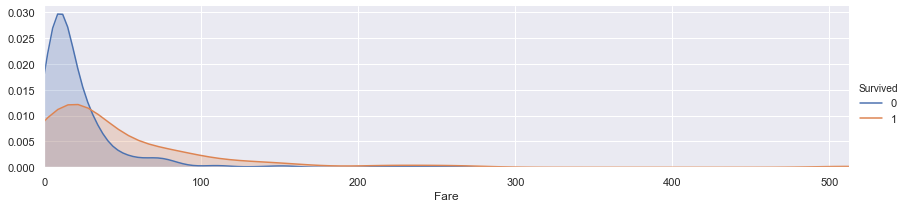

In [44]:
facet = sns.FacetGrid(train, hue='Survived', aspect=4)
facet.map(sns.kdeplot,'Fare', shade=True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
plt.xlim(0)

In [45]:
for dataset in train_test_data:
    dataset.loc[ dataset['Fare'] <= 17, 'Fare'] = 0,
    dataset.loc[(dataset['Fare'] > 17) & (dataset['Fare'] <= 30), 'Fare'] = 1,
    dataset.loc[(dataset['Fare'] > 30) & (dataset['Fare'] <= 100), 'Fare'] = 2,
    dataset.loc[dataset['Fare'] > 100, 'Fare' ] = 3

In [46]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,2.0,C85,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,2.0,C123,0,2
4,5,0,3,0,2.0,0,0,373450,0.0,NaN,0,0


## Cabin values


In [47]:
train.Cabin.value_counts()

C23 C25 C27    4
G6             4
B96 B98        4
F33            3
C22 C26        3
E101           3
D              3
F2             3
D36            2
C92            2
D33            2
E121           2
B58 B60        2
C78            2
F G73          2
C52            2
C2             2
D17            2
D20            2
B35            2
C65            2
E67            2
B28            2
B18            2
E8             2
C125           2
B20            2
B22            2
E24            2
E25            2
              ..
C32            1
E50            1
C7             1
C103           1
F E69          1
A6             1
C106           1
C50            1
C82            1
B79            1
A31            1
A14            1
A20            1
D9             1
C91            1
D56            1
E68            1
D10 D12        1
B94            1
D50            1
D11            1
E12            1
C47            1
B38            1
A16            1
B42            1
A26            1
C128          

In [48]:
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].str[:1]

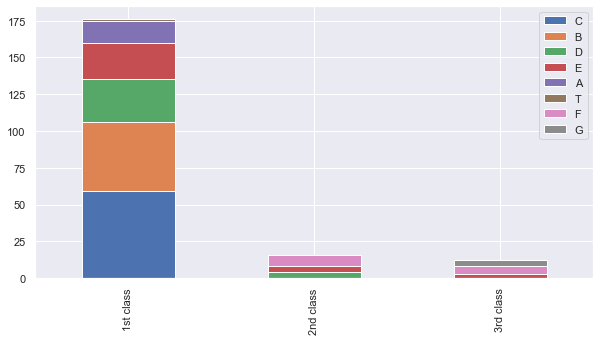

In [49]:
Pclass1 = train[train['Pclass']==1]['Cabin'].value_counts()
Pclass2 = train[train['Pclass']==2]['Cabin'].value_counts()
Pclass3 = train[train['Pclass']==3]['Cabin'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class', '2nd class', '3rd class']
df.plot(kind='bar', stacked=True, figsize=(10,5)) 

In [50]:
cabin_mapping = {'A': 0, 'B': 0.4, 'C': 0.8, 'D': 1.2, 'E':1.6, 'F': 2, 'G': 2.4, 'T': 2.8}
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].map(cabin_mapping)

In [51]:
# filling na cabins
train['Cabin'].fillna(train.groupby('Pclass')['Cabin'].transform('median'), inplace=True)
test['Cabin'].fillna(train.groupby('Pclass')['Cabin'].transform('median'), inplace=True)

## FamilySize

In [52]:
# Combine the passenger with the number of Sibsp and Parch
train["FamilySize"] = train["SibSp"] + train["Parch"] + 1
test["FamilySize"] = test["SibSp"] + test["Parch"] + 1

(0, 11.0)

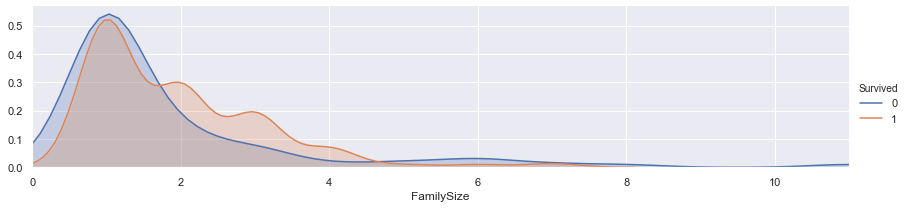

In [53]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'FamilySize',shade= True)
facet.set(xlim=(0, train['FamilySize'].max()))
facet.add_legend()
plt.xlim(0)

In [54]:
features_drop = ['Ticket', 'SibSp', 'Parch']
train = train.drop(features_drop, axis=1)
test = test.drop(features_drop, axis=1)
train = train.drop(['PassengerId'], axis=1)

family_mapping = {1: 0, 2: 0.4, 3: 0.8, 4: 1.2, 5: 1.6, 6: 2, 7: 2.4, 8: 2.8, 9: 3.2, 10: 3.6, 11: 4}
for dataset in train_test_data:
    dataset['FamilySize'] = dataset['FamilySize'].map(family_mapping)

In [55]:
train_data = train.drop('Survived', axis=1)
target = train['Survived']

train_data.shape, target.shape

((891, 8), (891,))

In [56]:
train_data.head()

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,3,0,1.0,0.0,2.0,0,0,2
1,1,1,3.0,2.0,0.8,1,2,2
2,3,1,1.0,0.0,2.0,0,1,1
3,1,1,2.0,2.0,0.8,0,2,2
4,3,0,2.0,0.0,2.0,0,0,1


In [57]:
# Importing Classifier Modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import numpy as np

In [58]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived      891 non-null int64
Pclass        891 non-null int64
Sex           891 non-null int64
Age           891 non-null float64
Fare          891 non-null float64
Cabin         891 non-null float64
Embarked      891 non-null int64
Title         891 non-null int64
FamilySize    891 non-null int64
dtypes: float64(3), int64(6)
memory usage: 62.7 KB


## Cross Validation

In [59]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

## k-Nearest-Neighbour


In [60]:
clf = KNeighborsClassifier(n_neighbors = 13)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.81111111 0.78651685 0.85393258 0.82022472 0.80898876 0.82022472
 0.84269663 0.80898876 0.83146067 0.84269663]


In [61]:
# kNN score
# numpy.mean(array) gets the average of the array
round(np.mean(score)*100, 2)

82.27

## Decision Tree

In [62]:
clf = KNeighborsClassifier(n_neighbors = 13)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.81111111 0.78651685 0.85393258 0.82022472 0.80898876 0.82022472
 0.84269663 0.80898876 0.83146067 0.84269663]


In [63]:
# decision tree score
round(np.mean(score)*100, 2)

82.27

## Random Forest

In [64]:
clf = RandomForestClassifier(n_estimators=13)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.81111111 0.83146067 0.78651685 0.76404494 0.88764045 0.79775281
 0.82022472 0.80898876 0.76404494 0.82022472]


In [65]:
# Random Forest Score
round(np.mean(score)*100, 2)

80.92

## Naive Bayes

In [66]:
clf = GaussianNB()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.85555556 0.73033708 0.75280899 0.75280899 0.70786517 0.80898876
 0.76404494 0.80898876 0.86516854 0.83146067]


In [67]:
# Naive Bayes Score
round(np.mean(score)*100, 2)

78.78

## Support Vector Machine

In [68]:
clf = SVC(gamma='auto')
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.82222222 0.79775281 0.83146067 0.82022472 0.84269663 0.82022472
 0.83146067 0.84269663 0.84269663 0.86516854]


In [69]:
round(np.mean(score)*100,2)

83.17

# Testing

In [70]:
clf = SVC(gamma='auto')
clf.fit(train_data, target)

test_data = test.drop("PassengerId", axis=1).copy()
prediction = clf.predict(test_data)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
submission = pd.DataFrame({
    "PassengerID": test["PassengerId"],
    "Survived": prediction
})

submission.to_csv('submission.csv', index=False)

In [ ]:
submission = pd.read_csv('submission.csv')
submission.head()